Feature Description
label :Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
msisdn :mobile number of user
aon :age on cellular network in days
daily_decr30 :Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
daily_decr90 :Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
rental30 :Average main account balance over last 30 days
rental90 :Average main account balance over last 90 days
last_rech_date_ma :Number of days till last recharge of main account
last_rech_date_da : Number of days till last recharge of data account
last_rech_amt_ma : Amount of last recharge of main account (in Indonesian Rupiah)
cnt_ma_rech30 : Number of times main account got recharged in last 30 days
fr_ma_rech30 : Frequency of main account recharged in last 30 days
sumamnt_ma_rech30 : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
medianamnt_ma_rech30 : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
cnt_ma_rech90 : Number of times main account got recharged in last 90 days
fr_ma_rech90 : Frequency of main account recharged in last 90 days
sumamnt_ma_rech90: Total amount of recharge in main account over last 90 days (in Indian Rupee)
medianamnt_ma_rech90 :Median of amount of recharges done in main account over last 90 days at user level (in Indian Rupee)
medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indian Rupee)
cnt_da_rech30 : Number of times data account got recharged in last 30 days
fr_da_rech30 : Frequency of data account recharged in last 30 days
cnt_da_rech90 : Number of times data account got recharged in last 90 days
fr_da_rech90 : Frequency of data account recharged in last 90 days
cnt_loans30 : Number of loans taken by user in last 30 days
amnt_loans30 : Total amount of loans taken by user in last 30 days
maxamnt_loans30 : maximum amount of loan taken by the user in last 30 days
medianamnt_loans30 : Median of amounts of loan taken by the user in last 30 days
cnt_loans90: Number of loans taken by user in last 90 days
amnt_loans90 :Total amount of loans taken by user in last 90 days
maxamnt_loans90 : maximum amount of loan taken by the user in last 90 days
medianamnt_loans90: Median of amounts of loan taken by the user in last 90 days
payback30 :Average payback time in days over last 30 days
payback90: Average payback time in days over last 90 days
pcircle: telecom circle
pdate:date

In [2]:
import pandas as pd
import numpy as np
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder,power_transform
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'C:\Users\deepak.mukati\OneDrive\Desktop\Internship\Micro Credit Project\\Data file.csv')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [5]:
df.shape

(209593, 37)

In [6]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [7]:
df.isnull().sum().sum()

0

In [8]:
(df == 0).any(axis=1)

0         True
1         True
2         True
3         True
4         True
          ... 
209588    True
209589    True
209590    True
209591    True
209592    True
Length: 209593, dtype: bool

In [9]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [10]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [11]:
df.corr()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
Unnamed: 0,1.000000,0.000403,-0.002048,0.002739,0.003077,-0.003906,-0.003459,-0.001853,-0.001133,-0.001064,...,0.001725,0.002387,0.000698,-0.002005,0.002241,0.000781,0.001742,-0.002615,-0.000040,0.002411
label,0.000403,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.002048,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.002739,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.003077,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,-0.003906,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,-0.003459,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,-0.001853,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,-0.001133,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,-0.001064,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260


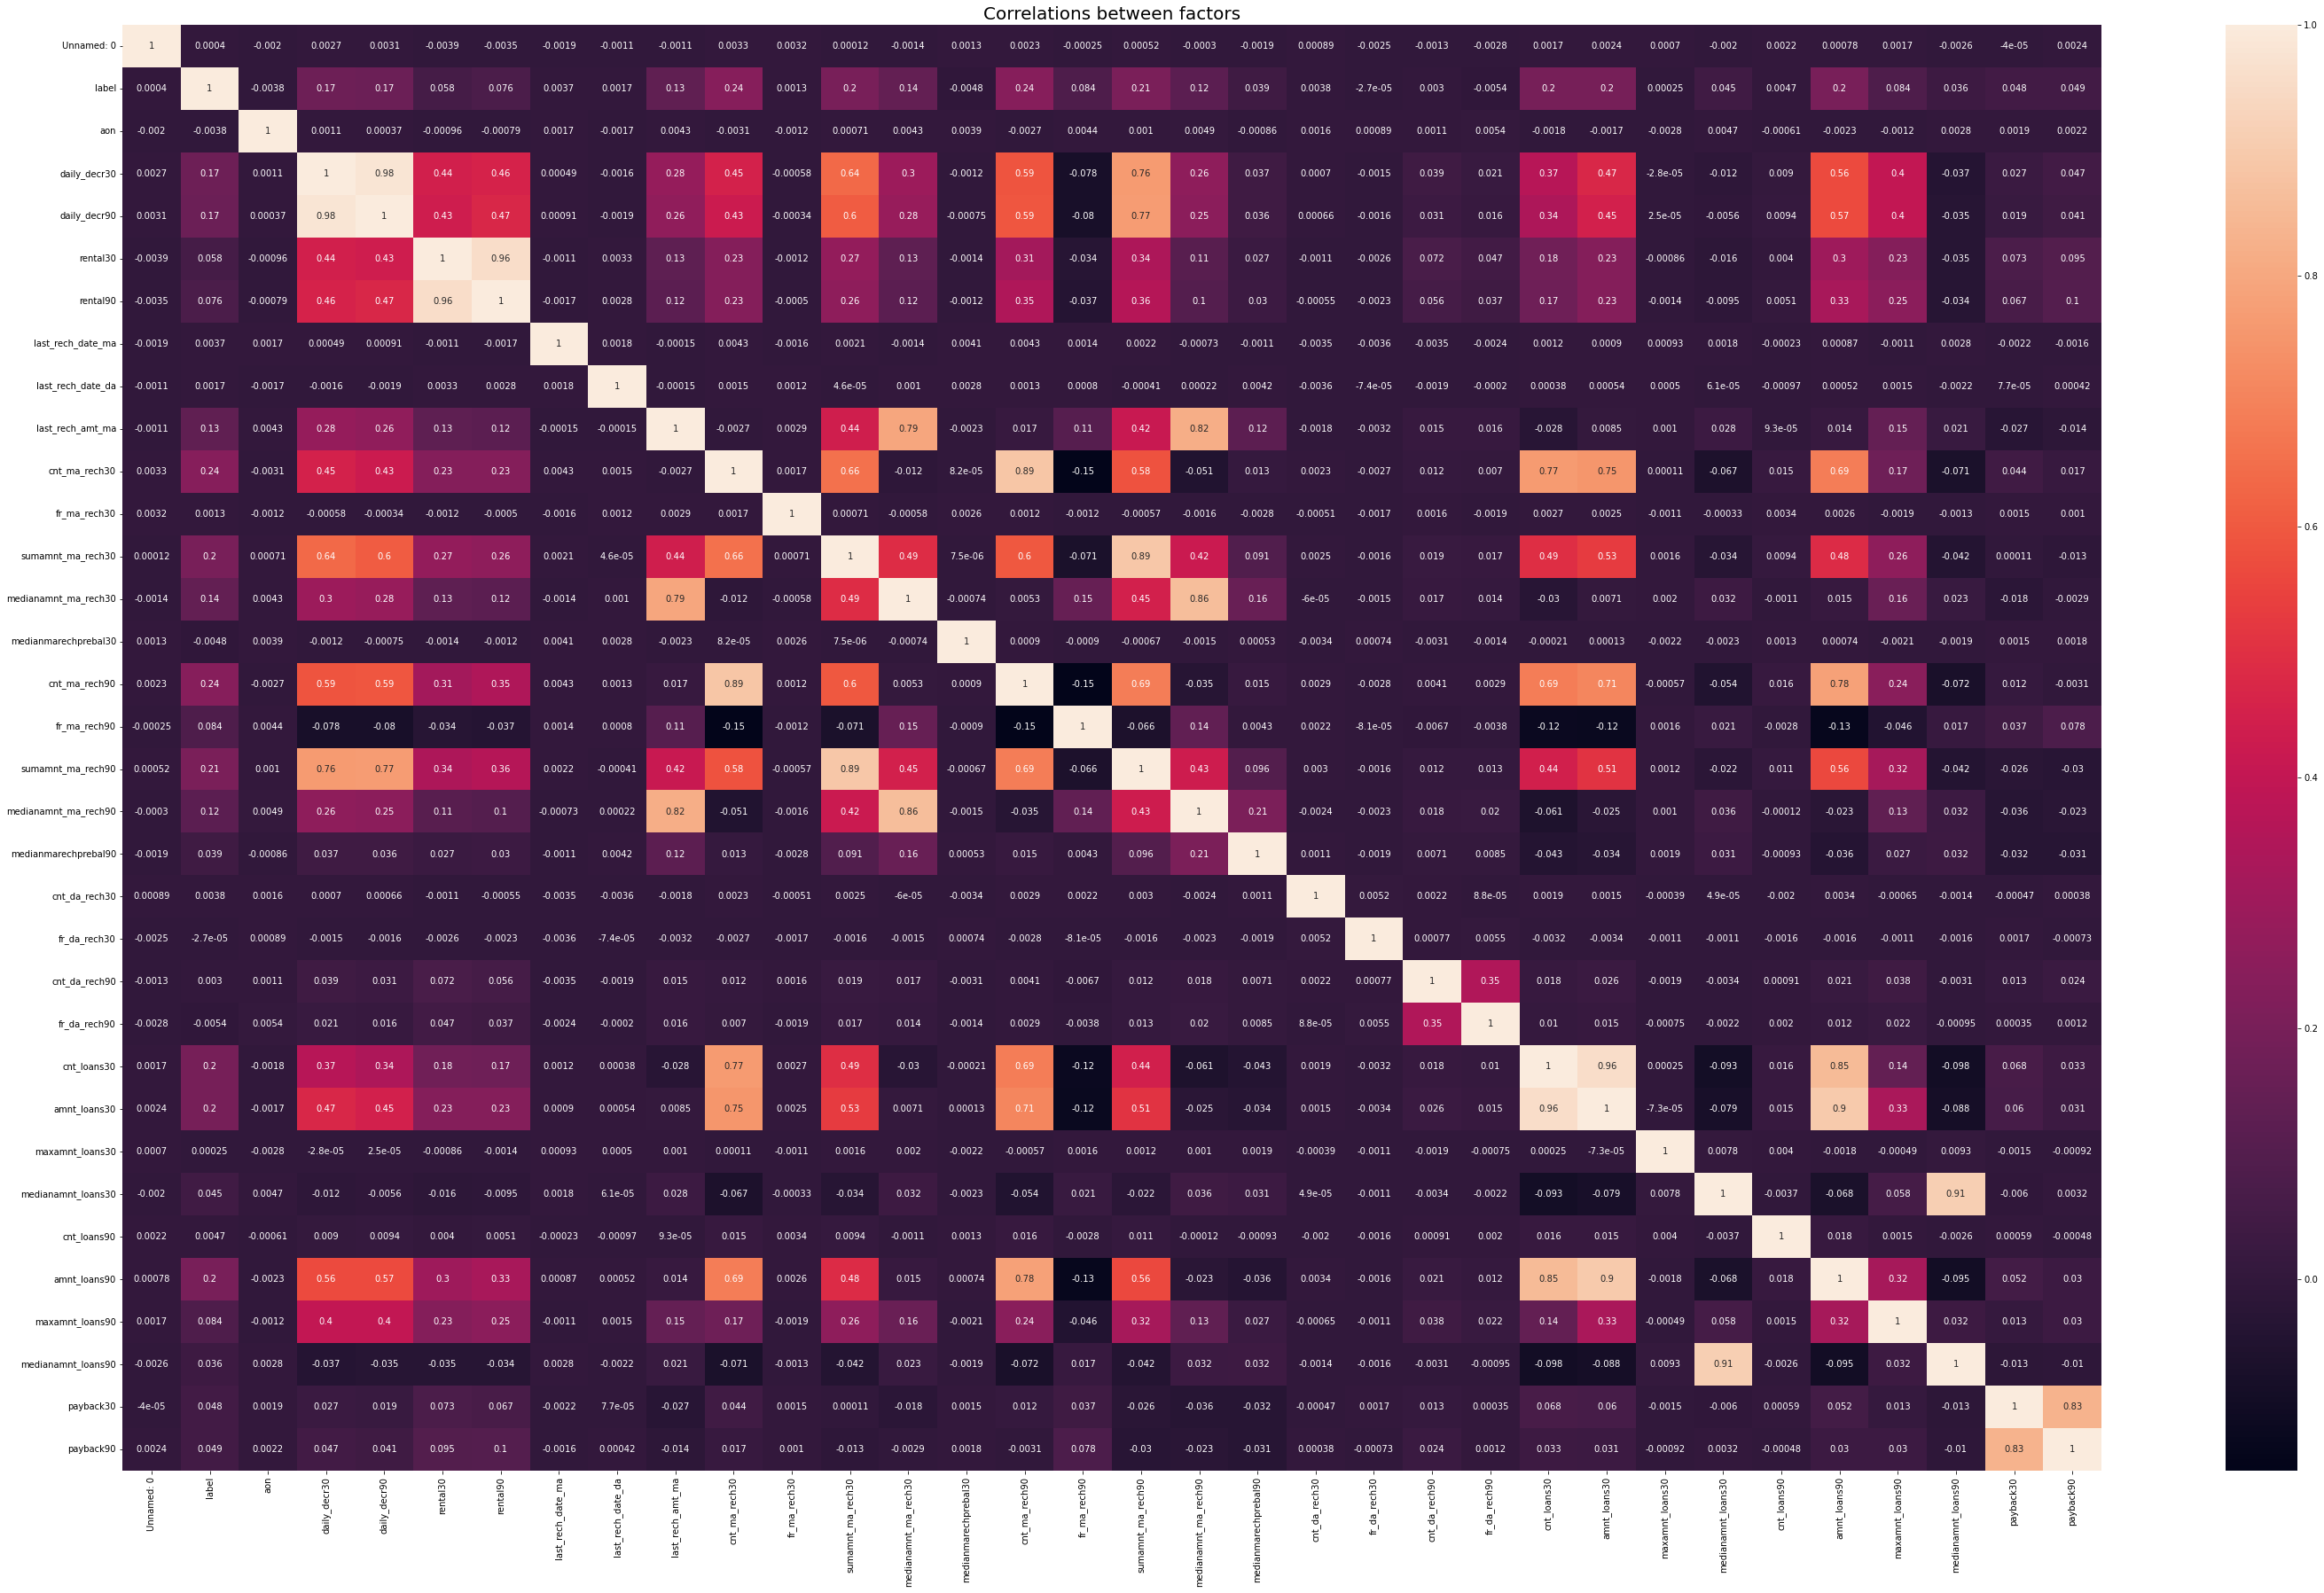

In [12]:
plt.figure(figsize=(50, 30))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlations between factors',fontsize=20)
plt.savefig('correlation_between _factors.jpg')
plt.show()

In [13]:
#NOW we check for skewness in data

df.skew()

Unnamed: 0               0.000000
label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

In [14]:
enc=OrdinalEncoder()
df['payback30']=enc.fit_transform(df['payback30'].values.reshape(-1,1))
df['payback90']=enc.fit_transform(df['payback90'].values.reshape(-1,1))
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,850.0,1749.0,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.0,0.0,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.0,0.0,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,244.0,439.0,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.0,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.0,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,380.0,802.0,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,1300.0,UPW,2016-07-25


1    183431
0     26162
Name: label, dtype: int64

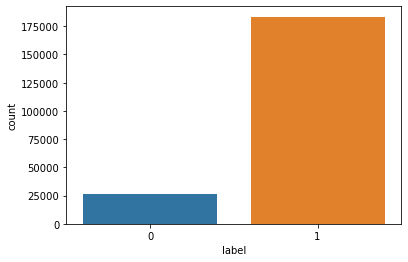

In [56]:
#now we see the count of loan status
sns.countplot(df['label'])
df['label'].value_counts()

In [15]:
df.columns


Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [16]:
#loan application approved more no of times than it is rejected.....

correlations = df.corr()['label'].sort_values(ascending=False)
print(correlations)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
payback90               0.175943
daily_decr30            0.168298
payback30               0.168042
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
Unnamed: 0              0.000403
maxamnt_loans30         0.000248
fr_da_rech

<AxesSubplot:>

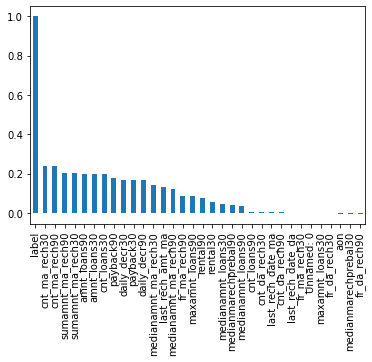

In [17]:
#the attributes share positive as well as negaative correlation with the target

correlations.plot(kind='bar')

In [18]:
df.corr()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
Unnamed: 0,1.000000,0.000403,-0.002048,0.002739,0.003077,-0.003906,-0.003459,-0.001853,-0.001133,-0.001064,...,0.001725,0.002387,0.000698,-0.002005,0.002241,0.000781,0.001742,-0.002615,0.000236,0.002102
label,0.000403,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.168042,0.175943
aon,-0.002048,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.000247,0.001600
daily_decr30,0.002739,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.123220,0.151937
daily_decr90,0.003077,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.114494,0.145407
rental30,-0.003906,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.128143,0.159198
rental90,-0.003459,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.127441,0.171775
last_rech_date_ma,-0.001853,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002220,-0.002281
last_rech_date_da,-0.001133,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,-0.001759,-0.001576
last_rech_amt_ma,-0.001064,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.050097,-0.026473


<AxesSubplot:xlabel='label', ylabel='aon'>

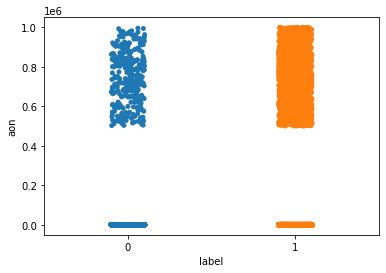

In [61]:
sns.stripplot(x='label',y='aon', data=df)

<AxesSubplot:xlabel='label', ylabel='daily_decr30'>

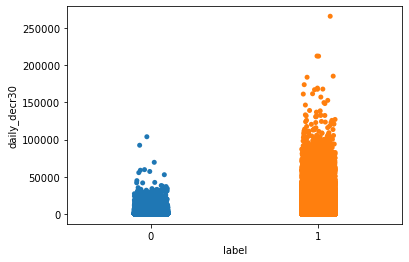

In [62]:
#the applicants who have income between  0 to 25000 have more chances of loan application approval.....

sns.stripplot(x='label',y='daily_decr30', data=df)

<AxesSubplot:xlabel='label', ylabel='daily_decr90'>

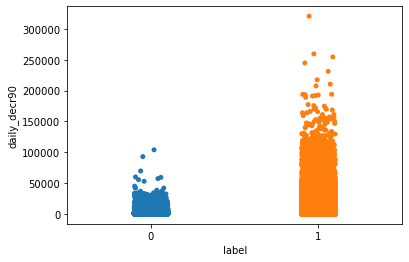

In [33]:

sns.stripplot(x='label',y='daily_decr90', data=df)

<AxesSubplot:xlabel='label', ylabel='rental30'>

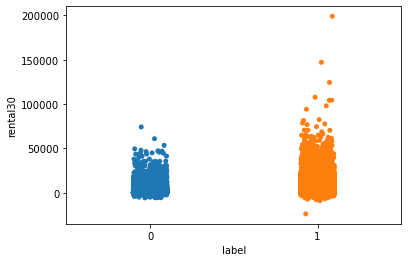

In [34]:
sns.stripplot(x='label',y='rental30', data=df)

<AxesSubplot:xlabel='label', ylabel='rental90'>

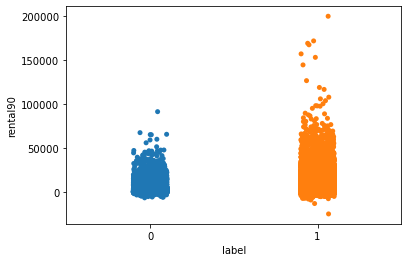

In [35]:
sns.stripplot(x='label',y='rental90', data=df)

<AxesSubplot:xlabel='label', ylabel='last_rech_date_ma'>

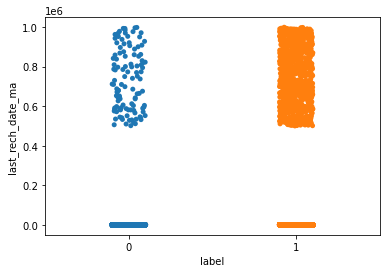

In [36]:
sns.stripplot(x='label',y='last_rech_date_ma', data=df)

<AxesSubplot:xlabel='label', ylabel='last_rech_date_da'>

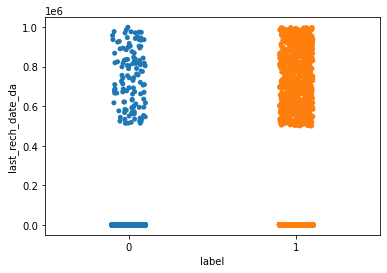

In [269]:
sns.stripplot(x='label',y='last_rech_date_da', data=df)

<AxesSubplot:xlabel='label', ylabel='last_rech_amt_ma'>

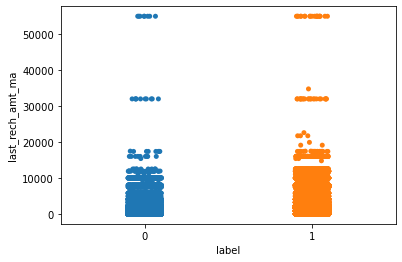

In [270]:
sns.stripplot(x='label',y='last_rech_amt_ma', data=df)

<AxesSubplot:xlabel='label', ylabel='sumamnt_ma_rech30'>

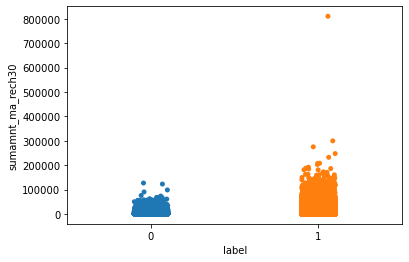

In [271]:
sns.stripplot(x='label',y='sumamnt_ma_rech30', data=df)

<AxesSubplot:xlabel='label', ylabel='medianamnt_ma_rech30'>

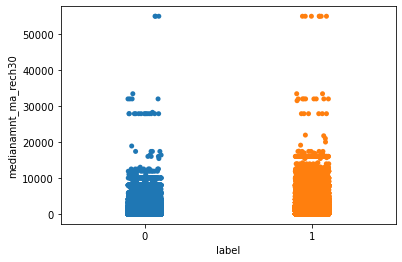

In [272]:
sns.stripplot(x='label',y='medianamnt_ma_rech30', data=df)

<AxesSubplot:xlabel='label', ylabel='medianmarechprebal30'>

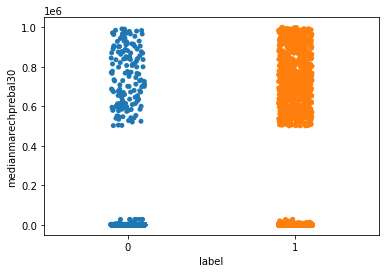

In [273]:
sns.stripplot(x='label',y='medianmarechprebal30', data=df)

<AxesSubplot:xlabel='label', ylabel='cnt_ma_rech90'>

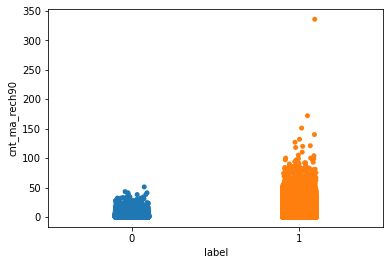

In [274]:
sns.stripplot(x='label',y='cnt_ma_rech90', data=df)

<AxesSubplot:xlabel='label', ylabel='fr_ma_rech90'>

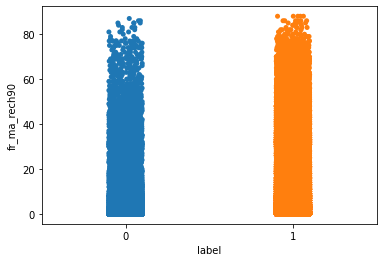

In [275]:
sns.stripplot(x='label',y='fr_ma_rech90', data=df)

<AxesSubplot:xlabel='label', ylabel='sumamnt_ma_rech90'>

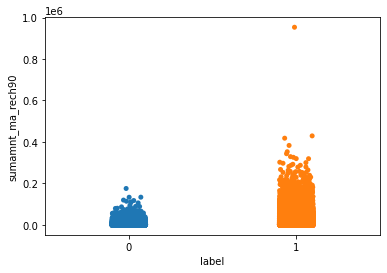

In [276]:
sns.stripplot(x='label',y='sumamnt_ma_rech90', data=df)

<AxesSubplot:xlabel='label', ylabel='medianamnt_ma_rech90'>

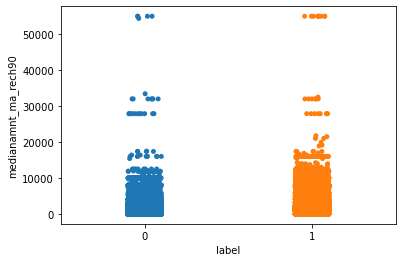

In [277]:
sns.stripplot(x='label',y= 'medianamnt_ma_rech90', data=df)

<AxesSubplot:xlabel='label', ylabel='medianmarechprebal90'>

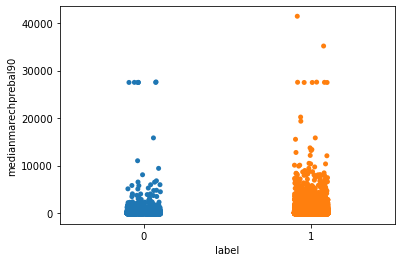

In [278]:
sns.stripplot(x='label',y='medianmarechprebal90', data=df)

<AxesSubplot:xlabel='label', ylabel='cnt_da_rech30'>

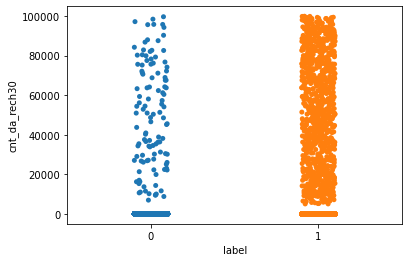

In [279]:
sns.stripplot(x='label',y='cnt_da_rech30', data=df)

<AxesSubplot:xlabel='label', ylabel='fr_da_rech30'>

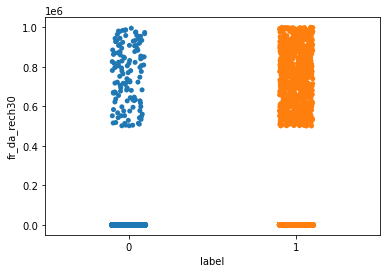

In [280]:
sns.stripplot(x='label',y='fr_da_rech30', data=df)


<AxesSubplot:xlabel='label', ylabel='cnt_da_rech90'>

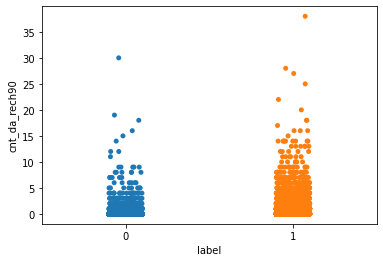

In [281]:
sns.stripplot(x='label',y='cnt_da_rech90', data=df)

<AxesSubplot:xlabel='label', ylabel='fr_da_rech90'>

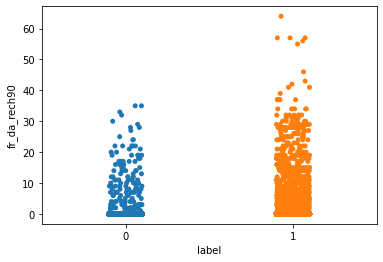

In [282]:
sns.stripplot(x='label',y='fr_da_rech90',data=df)

<AxesSubplot:xlabel='label', ylabel='cnt_loans30'>

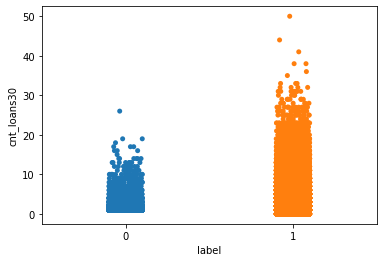

In [283]:
sns.stripplot(x='label',y= 'cnt_loans30', data=df)

<AxesSubplot:xlabel='label', ylabel='amnt_loans30'>

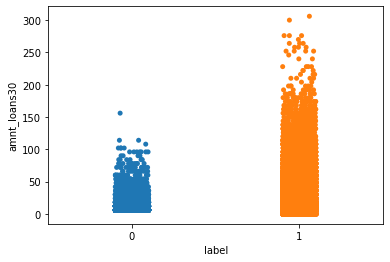

In [284]:
sns.stripplot(x='label',y= 'amnt_loans30',data=df)

<AxesSubplot:xlabel='label', ylabel='maxamnt_loans30'>

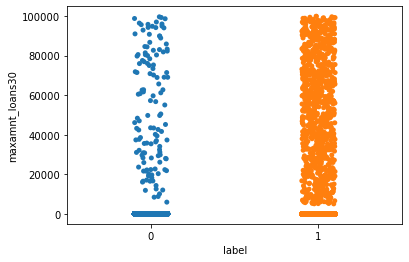

In [285]:
sns.stripplot(x='label',y='maxamnt_loans30', data=df)

<AxesSubplot:xlabel='label', ylabel='medianamnt_loans30'>

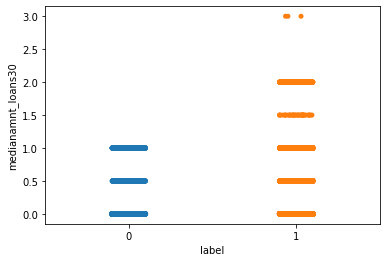

In [286]:
sns.stripplot(x='label',y='medianamnt_loans30', data=df)

<AxesSubplot:xlabel='label', ylabel='cnt_loans90'>

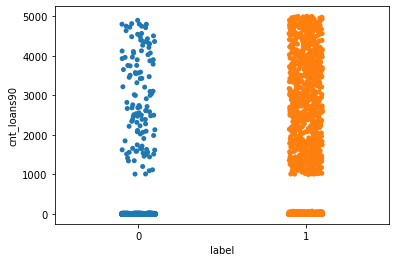

In [287]:
sns.stripplot(x='label',y= 'cnt_loans90', data=df)

<AxesSubplot:xlabel='label', ylabel='maxamnt_loans90'>

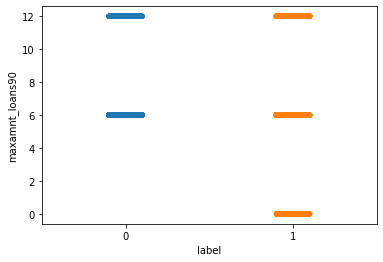

In [288]:
sns.stripplot(x='label',y='maxamnt_loans90', data=df)

<AxesSubplot:xlabel='label', ylabel='amnt_loans90'>

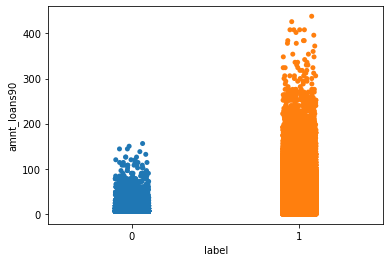

In [289]:
sns.stripplot(x='label',y= 'amnt_loans90',data=df)

<AxesSubplot:xlabel='label', ylabel='medianamnt_loans90'>

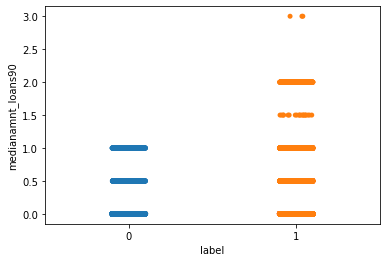

In [290]:
sns.stripplot(x='label',y='medianamnt_loans90', data=df)

<AxesSubplot:xlabel='label', ylabel='payback30'>

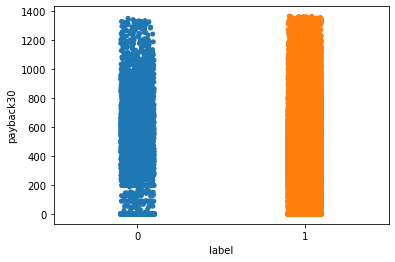

In [291]:
sns.stripplot(x='label',y= 'payback30', data=df)

<AxesSubplot:xlabel='label', ylabel='payback90'>

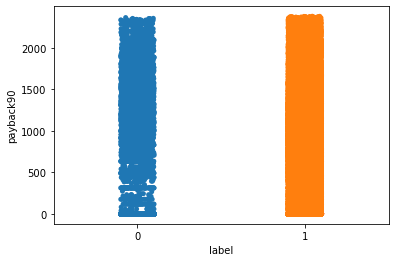

In [292]:
sns.stripplot(x='label',y='payback90', data=df)

In [23]:

X = df.drop(columns=['label','Unnamed: 0','msisdn','pcircle','pdate'])
y = df['label']

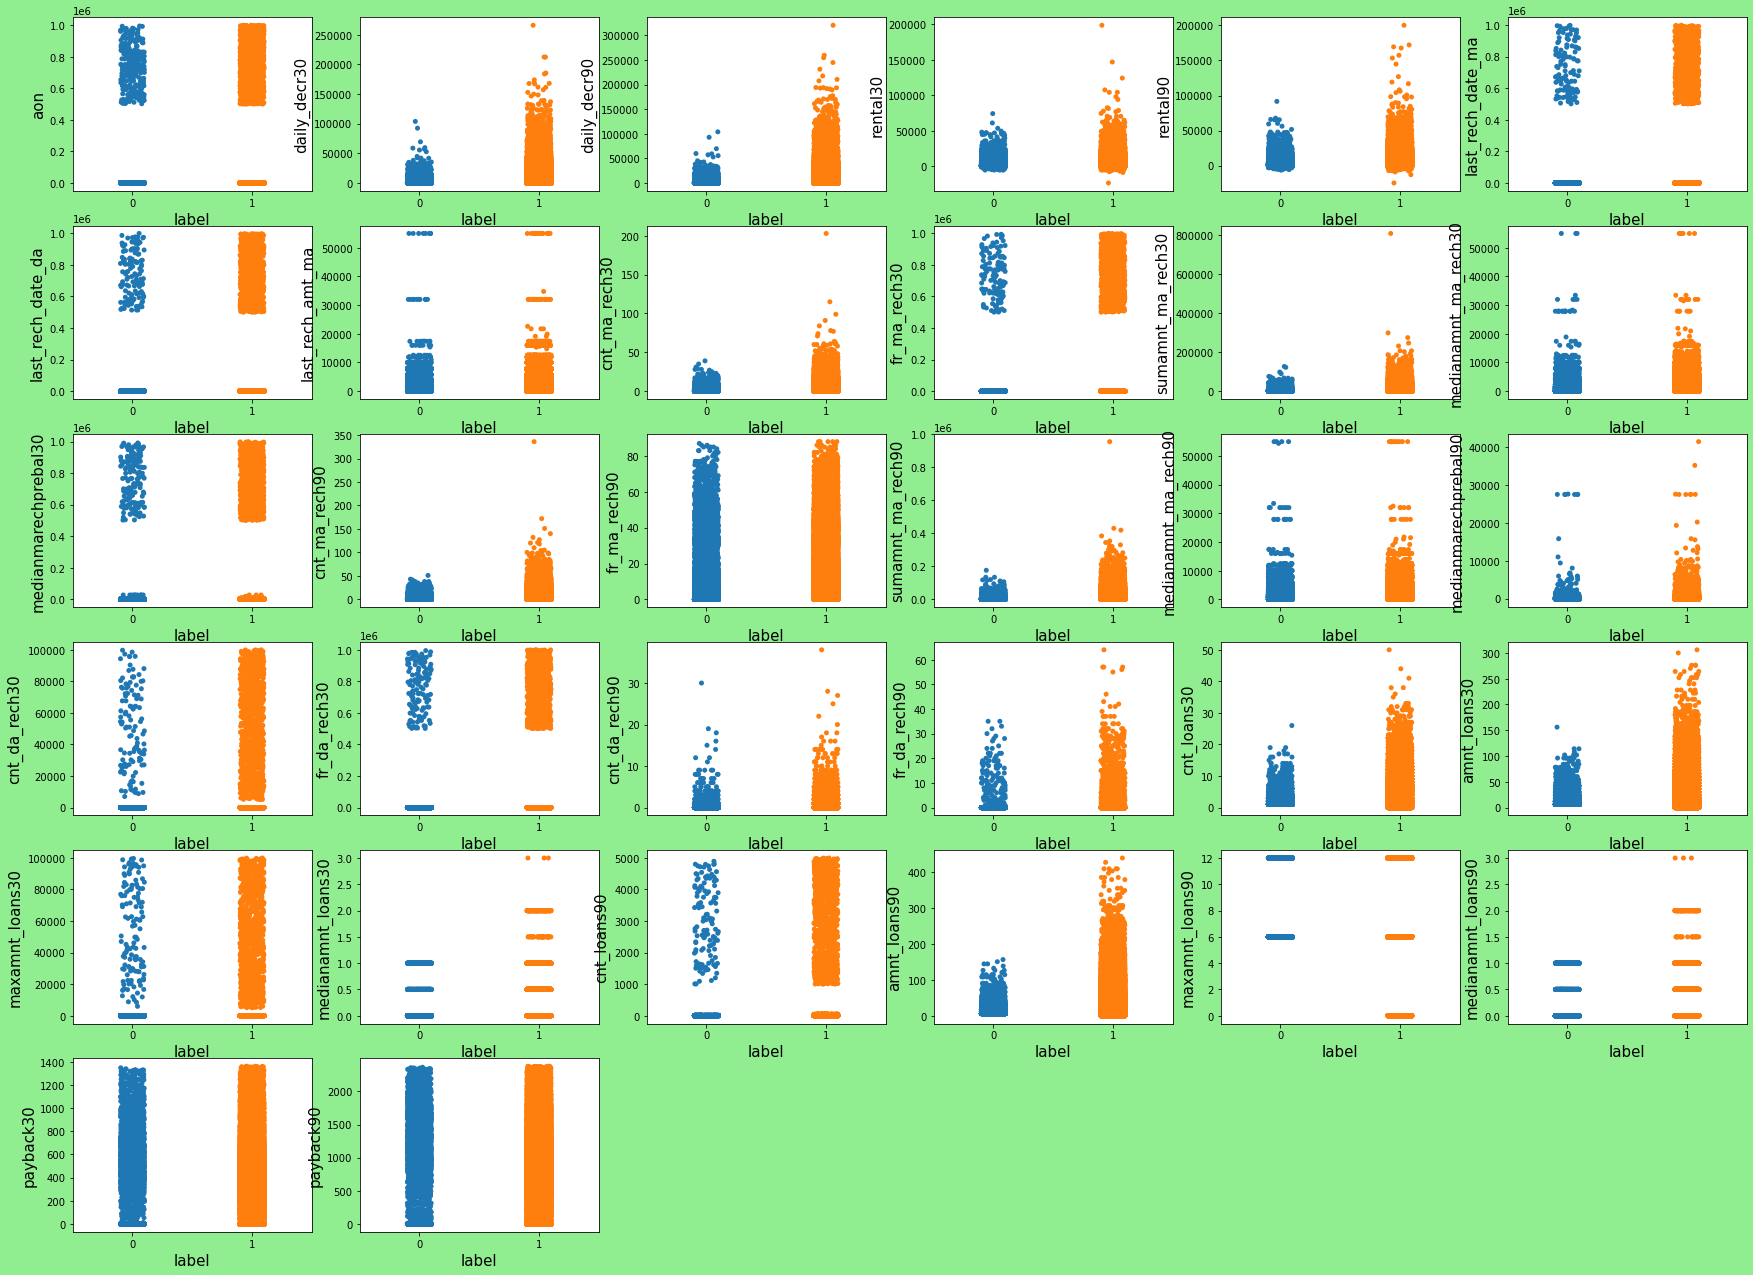

In [24]:
plt.figure(figsize=(30,30),facecolor='lightgreen')
plotnumber=1

for column in X:
    if plotnumber<=40:
        ax = plt.subplot(8,6,plotnumber)
        sns.stripplot(y,X[column])
        plt.xlabel('label',fontsize=15)
        plt.ylabel(column,fontsize=15)
    plotnumber+=1
plt.show()

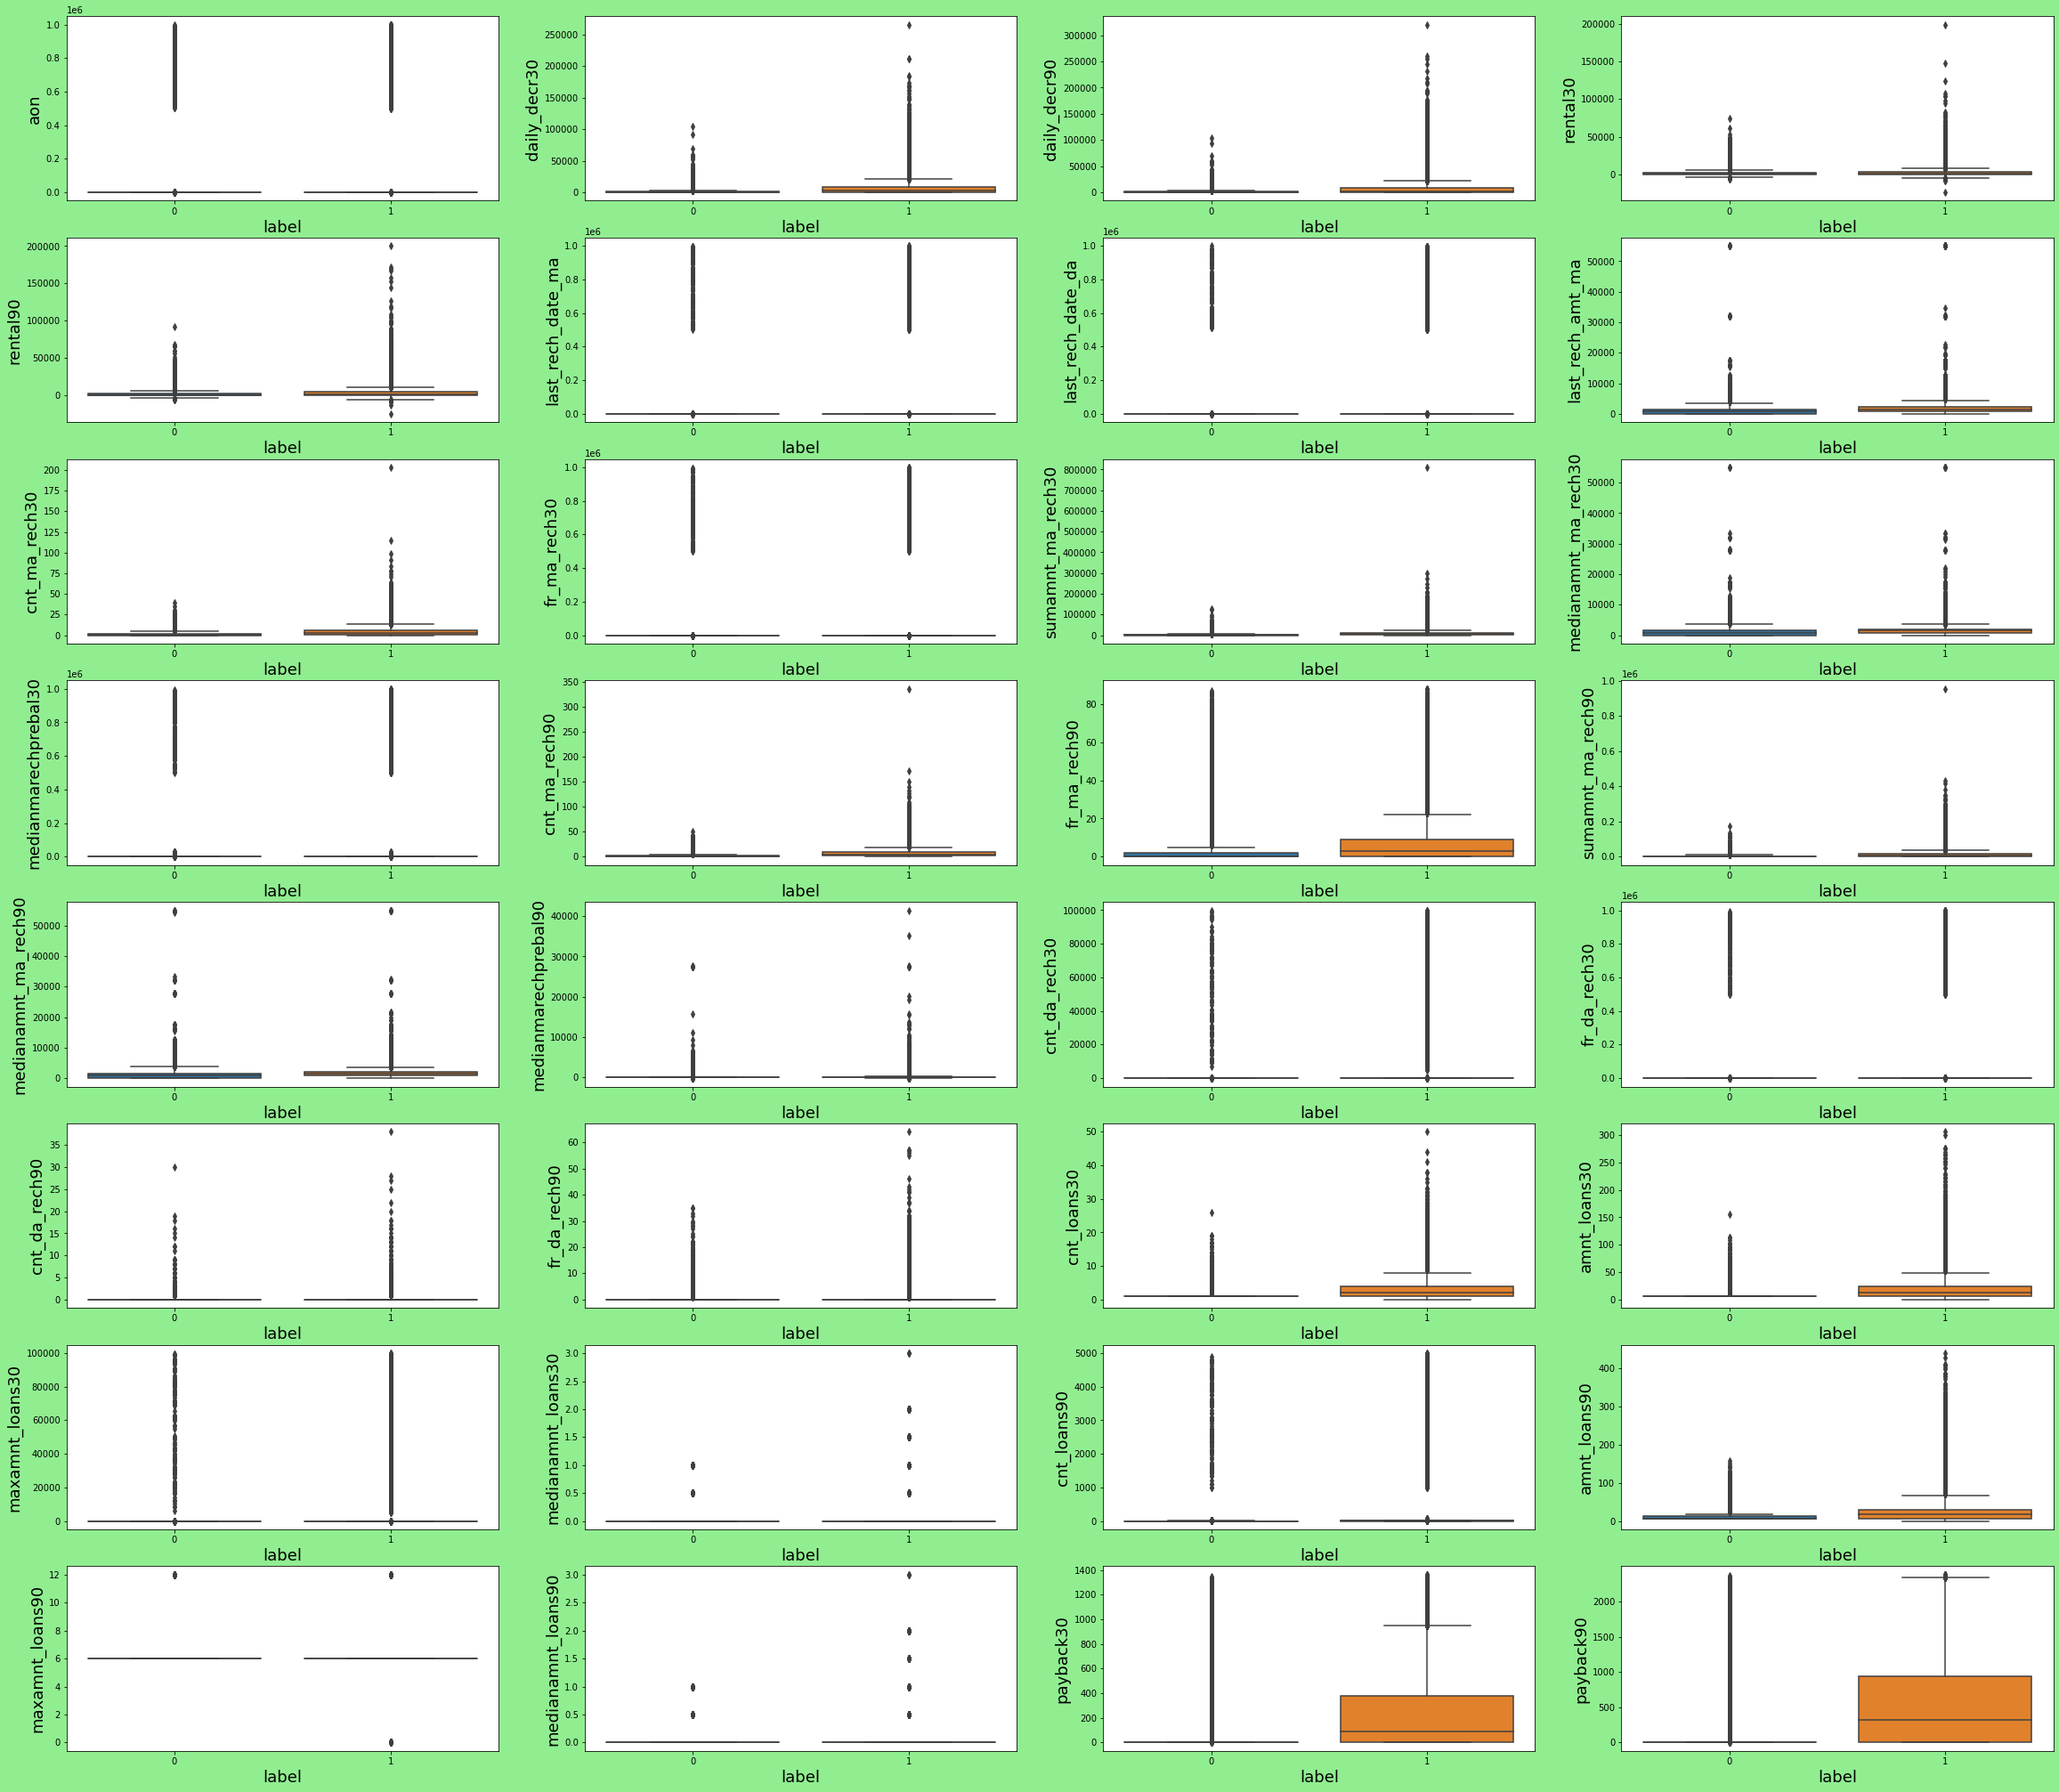

In [25]:
plt.figure(figsize=(40,45),facecolor='lightgreen')
plotnumber=1

for column in X:
    if plotnumber<=40:
        ax = plt.subplot(10,4,plotnumber)
        sns.boxplot(y,X[column])
        plt.xlabel('label',fontsize=18)
        plt.ylabel(column,fontsize=18)
    plotnumber+=1
plt.show()

In [26]:
df.skew()

Unnamed: 0               0.000000
label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

In [27]:
#now we remove skewness by power transform...

x_new=power_transform(X)

In [28]:
pd.DataFrame(x_new).skew().sort_values(ascending=True)

6    -106.606655
2      -7.080193
1      -6.582717
5      -5.362529
24     -1.680107
3      -1.022844
4      -0.962717
10     -0.291322
15     -0.192158
11     -0.189628
12     -0.119058
7      -0.061262
31     -0.055773
16     -0.044604
27     -0.008988
13     -0.002465
8      -0.000145
23      0.001948
22      0.036243
26      0.105580
30      0.120125
14      0.142952
9       0.165015
28      0.364282
0       1.654517
25      3.447735
29      3.779598
20      6.006577
18      6.925820
17      7.506286
19     11.390665
21     15.469700
dtype: float64

In [29]:
df.skew()

Unnamed: 0               0.000000
label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

In [30]:
from scipy.stats import zscore
(np.abs(zscore(X))<3).all()

aon                     False
daily_decr30            False
daily_decr90            False
rental30                False
rental90                False
last_rech_date_ma       False
last_rech_date_da       False
last_rech_amt_ma        False
cnt_ma_rech30           False
fr_ma_rech30            False
sumamnt_ma_rech30       False
medianamnt_ma_rech30    False
medianmarechprebal30    False
cnt_ma_rech90           False
fr_ma_rech90            False
sumamnt_ma_rech90       False
medianamnt_ma_rech90    False
medianmarechprebal90    False
cnt_da_rech30           False
fr_da_rech30            False
cnt_da_rech90           False
fr_da_rech90            False
cnt_loans30             False
amnt_loans30            False
maxamnt_loans30         False
medianamnt_loans30      False
cnt_loans90             False
amnt_loans90            False
maxamnt_loans90         False
medianamnt_loans90      False
payback30               False
payback90               False
dtype: bool

In [52]:
z = np.abs(stats.zscore(df['capital-loss']))
print(z)

index=np.where(z > 3)
index

df = df.drop(df.index[index])
df.shape

0      0.950583
1      0.950583
2      0.950583
3      1.285519
4      0.697826
         ...   
995    0.950583
996    0.950583
997    0.950583
998    0.950583
999    0.950583
Name: capital-loss, Length: 989, dtype: float64


(989, 39)

In [31]:
#Data scaling Z=(X-mean)/std:

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [32]:
X_scaled.shape[1]

32

In [33]:
#now train and test split  and training and fitting test model at random state 0 so that we can find best random state:
for i in range(0,100):
    X_train,X_test,y_train,y_test =train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    reg=LogisticRegression()
    reg.fit(X_train,y_train)
    pred_train = reg.predict(X_train)
    y_pred= reg.predict(X_test)
    print(f"At random state{i},the training accuracy is:-{accuracy_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{accuracy_score(y_test,y_pred)}")
    print("\n")

At random state0,the training accuracy is:-0.8768861004091273
At random state0,the testing accuracy is:-0.8744244853169207


At random state1,the training accuracy is:-0.876164461991722
At random state1,the testing accuracy is:-0.8776211264581694


At random state2,the training accuracy is:-0.8767131457471045
At random state2,the testing accuracy is:-0.8750685846513514


At random state3,the training accuracy is:-0.8760630747760535
At random state3,the testing accuracy is:-0.87752570433455


At random state4,the training accuracy is:-0.8764984434080418
At random state4,the testing accuracy is:-0.875736539516687


At random state5,the training accuracy is:-0.8768682085475387
At random state5,the testing accuracy is:-0.8744483408478255


At random state6,the training accuracy is:-0.8761704259455849
At random state6,the testing accuracy is:-0.8768577494692145


At random state7,the training accuracy is:-0.877381108579744
At random state7,the testing accuracy is:-0.8722774875354851


At ra

In [34]:
#so as we can interpret random state 8 is giving best train and test accuracy,so we train our model at random state 8:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [64]:
X_train.shape

(167674, 32)

In [65]:
y_train.shape

(167674,)

In [66]:
X_test.shape

(41919, 32)

In [67]:
y_test.shape

(41919,)

In [68]:
#now fitting our data to Machine learning models :

reg=LogisticRegression()
reg.fit(X_train,y_train)
y_pred= reg.predict(X_test)   
reg.score(X_train,y_train)
reg_score=accuracy_score(y_test,y_pred)
print('accuracy score:',reg_score*100)

regscore=cross_val_score(reg,X,y,cv=5)
lr=regscore.mean()
print('cross val score:',lr*100)

accuracy score: 87.01304897540496
cross val score: 86.82446537520386


In [70]:
knc= KNeighborsClassifier()  
knc.fit(X_train, y_train)  
knc.score(X_train,y_train)
y_pred=knc.predict(X_test)
knc_score=accuracy_score(y_test,y_pred)
print('accuracy score:',knc_score*100)

kncscore=cross_val_score(knc,X,y,cv=5)
kn=kncscore.mean()
print('cross val score:',kn*100)

accuracy score: 88.34180204680455
cross val score: 88.23481723533847


In [35]:
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred=dt.predict(X_test)
dts=accuracy_score(y_test,y_pred)
print('accuracy score:',dts*100)

dtscore=cross_val_score(dt,X,y,cv=5)
dtc=dtscore.mean()
print('cross val score:',dtc*100)

accuracy score: 86.54548056967008
cross val score: 86.49287120784486


In [30]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_train,y_train)
y_pred=rf.predict(X_test)
rfs=accuracy_score(y_test,y_pred)
print('accuracy score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

accuracy score: 91.43824995825283
cross val score: 91.28215219835319


In [31]:
#so according to dataset  LogisticRegression and Randomforestclassifier is getting best accuracy of 80%
#we will go ahead with RandomForestClassifier
#now we do gridsearcv hyperparametertuning on this algorithm

grid_parameters ={'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"],'max_depth':[4,5,6,7,8],'bootstrap': [True],
 'min_samples_leaf':[1]}
clf=GridSearchCV(rf,grid_parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1}


In [32]:
rf=RandomForestClassifier(bootstrap='True',criterion= 'entropy',max_features='log2',max_depth=5, max_leaf_nodes=None, min_samples_leaf= 1)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
y_pred=rf.predict(X_test)
rfs=accuracy_score(y_test,y_pred)
print('accuracy score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

accuracy score: 90.27410005009662
cross val score: 90.17715257931437


In [33]:
#model accuracy
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.9027410005009662

In [34]:
#confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[ 1268,  3926],
       [  151, 36574]], dtype=int64)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.24      0.38      5194
           1       0.90      1.00      0.95     36725

    accuracy                           0.90     41919
   macro avg       0.90      0.62      0.67     41919
weighted avg       0.90      0.90      0.88     41919



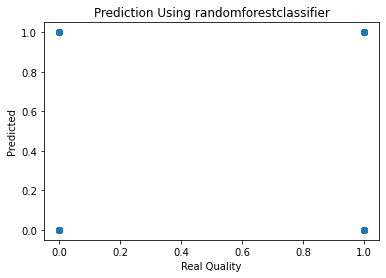

In [36]:
plt.scatter(y_test,y_pred)
plt.title("Prediction Using randomforestclassifier")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

In [37]:
type(clf)

sklearn.model_selection._search.GridSearchCV

In [38]:
clf.best_estimator_

RandomForestClassifier(max_depth=8, max_features='sqrt')

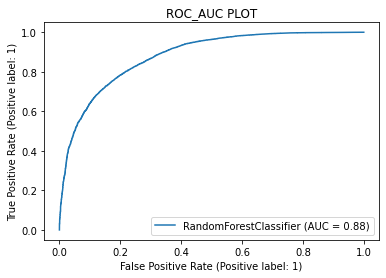

In [41]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf.best_estimator_,X_test,y_test)
plt.title("ROC_AUC PLOT")
plt.show()

In [43]:
#random forest classifier is best model with auc 88%....90% accuracy andf1 score of 95% for predicting label as 1

In [ ]:
#saving the model to local file system
filename='micro credit defaulter_model.pickle'
pickle.dump(rf,open(filename,'wb'))